In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year - 10, end.month, end.day)
stock = 'GOOG'
googledata = yf.download(stock,start,end)
googledata.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,,
2015-01-02,26.074963,26.168653,26.490770,26.133251,26.378078,28951268
2015-01-05,25.531416,25.623152,26.144720,25.582764,26.091366,41196796
2015-01-06,24.939672,25.029282,25.738087,24.983908,25.679497,57998800
2015-01-07,24.896942,24.986401,25.292759,24.914099,25.280592,41301082
2015-01-08,24.975445,25.065184,25.105074,24.482782,24.831326,67071641


In [4]:
googledata.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
count,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2.516000e+03
mean,82.515778,82.792465,83.630461,81.924345,82.741148,3.077518e+07
std,44.433661,44.552020,45.035485,44.080744,44.531883,1.536820e+07
min,24.472139,24.560070,24.730902,24.311253,24.664783,6.809800e+06
25%,46.309480,46.475875,46.725875,46.178812,46.491249,2.121550e+07
50%,64.451168,64.682751,65.090248,64.000002,64.558750,2.701925e+07
75%,120.560312,120.993502,122.294998,120.092497,121.024500,3.569050e+07
max,198.160004,198.160004,202.880005,196.690002,198.529999,2.232980e+08


In [5]:
googledata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2015-01-02 to 2024-12-31
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, GOOG)  2516 non-null   float64
 1   (Close, GOOG)      2516 non-null   float64
 2   (High, GOOG)       2516 non-null   float64
 3   (Low, GOOG)        2516 non-null   float64
 4   (Open, GOOG)       2516 non-null   float64
 5   (Volume, GOOG)     2516 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 137.6 KB


In [6]:
googledata.isna().sum()

,,0
Price,Ticker,
Adj Close,GOOG,0
Close,GOOG,0
High,GOOG,0
Low,GOOG,0
Open,GOOG,0
Volume,GOOG,0


In [7]:
Closing_price = googledata[['Close']]
Closing_price

Price,Close
Ticker,GOOG
Date,
2015-01-02,26.168653
2015-01-05,25.623152
2015-01-06,25.029282
2015-01-07,24.986401
2015-01-08,25.065184
...,...
2024-12-24,197.570007
2024-12-26,197.100006


Text(0.5, 1.0, 'Close price of Google')

<Figure size 1500x500 with 0 Axes>

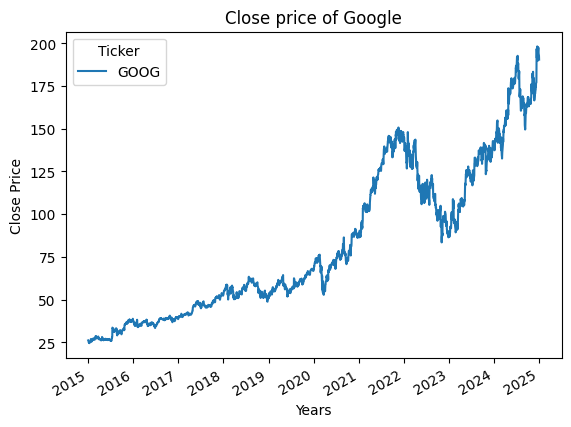

In [8]:
plt.figure(figsize=(15,5))
Closing_price['Close'].plot()
plt.xlabel('Years')
plt.ylabel('Close Price')
plt.title('Close price of Google')

<Figure size 1500x500 with 0 Axes>

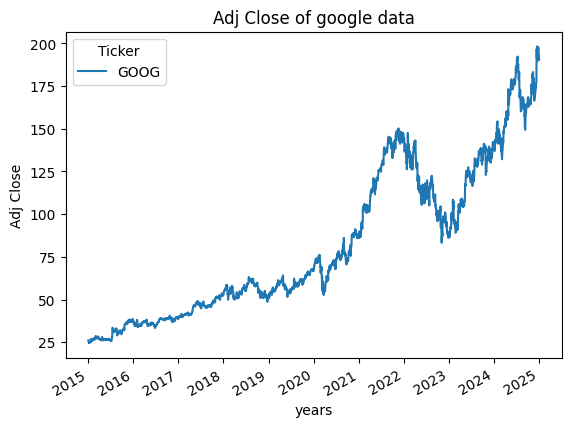

<Figure size 1500x500 with 0 Axes>

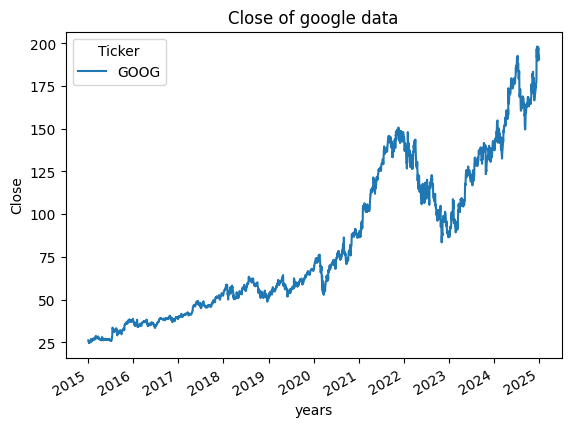

<Figure size 1500x500 with 0 Axes>

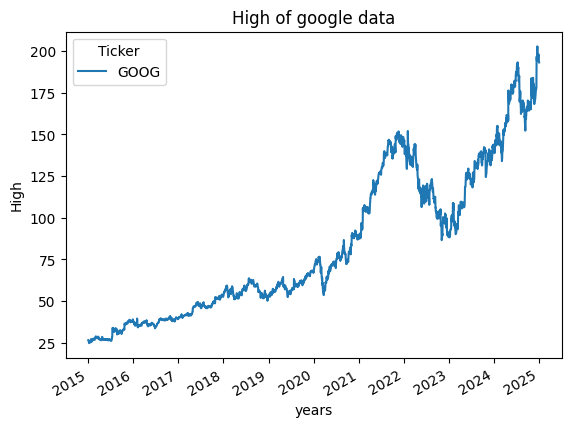

<Figure size 1500x500 with 0 Axes>

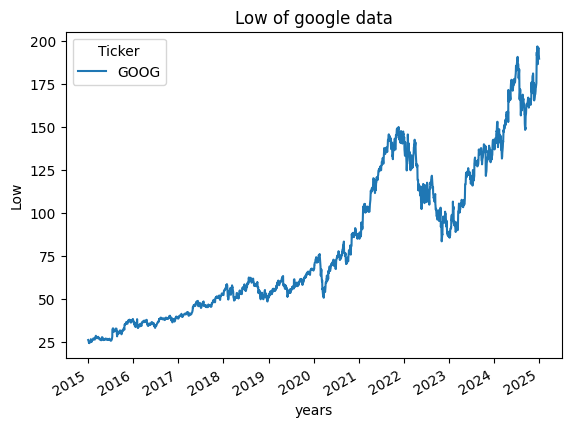

<Figure size 1500x500 with 0 Axes>

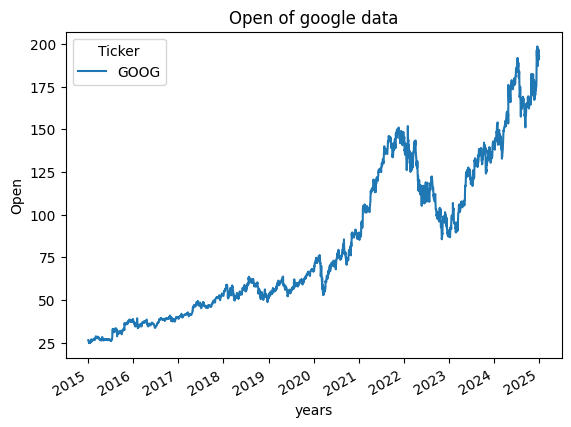

<Figure size 1500x500 with 0 Axes>

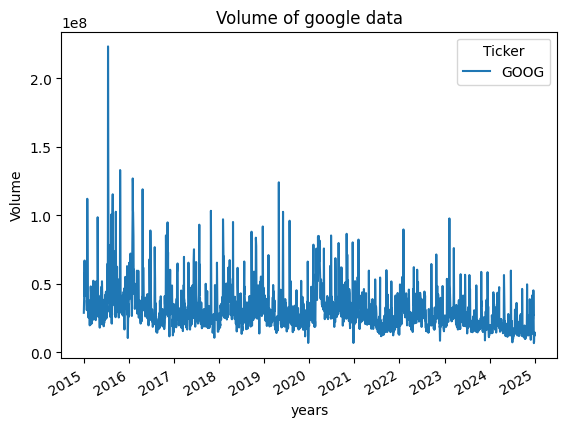

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
def plot_graph(figgsize,values,column_name):
    plt.figure(figsize=figgsize)
    values.plot()
    plt.xlabel('years')
    plt.ylabel(column_name)
    plt.title(f"{column_name} of google data")

for column in googledata.columns:
    plot_graph((15,5),googledata[column[0]],column[0])

In [10]:
Closing_price['MA_for_365_days'] = Closing_price['Close'].rolling(365).mean()

<ipython-input-10-fc82c428a018>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Closing_price['MA_for_365_days'] = Closing_price['Close'].rolling(365).mean()


In [11]:
Closing_price['MA_for_365_days'][0:365].tail()

,MA_for_365_days
Date,
2016-06-08,NaN
2016-06-09,NaN
2016-06-10,NaN
2016-06-13,NaN
2016-06-14,31.927154


<ipython-input-12-9486103011d7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Closing_price['MA_for_100_days'] = Closing_price['Close'].rolling(100).mean()


Text(0.5, 1.0, 'Close price of Google')

<Figure size 640x480 with 0 Axes>

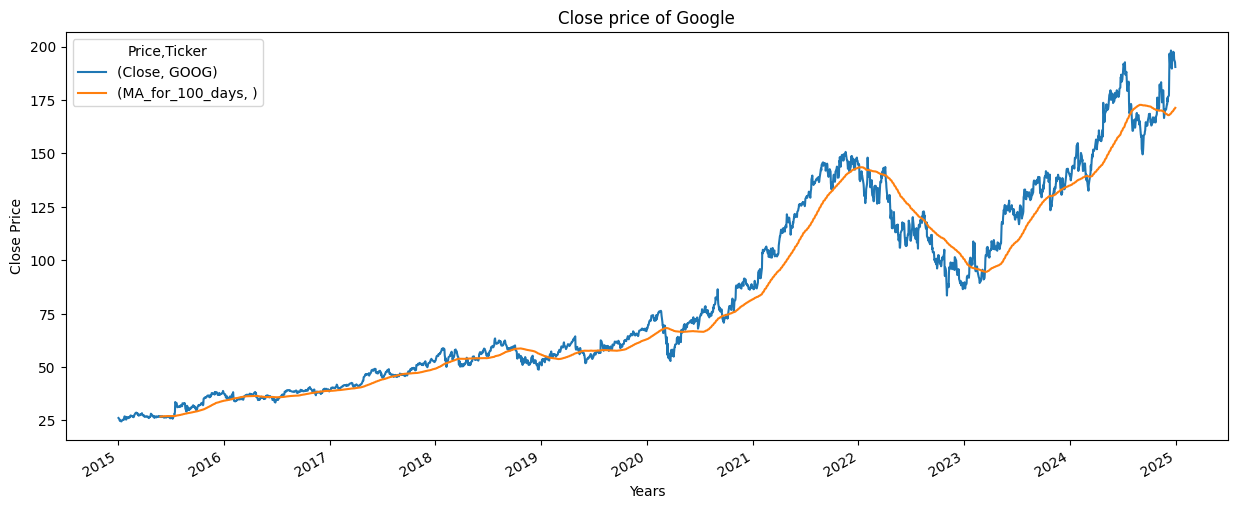

In [12]:
Closing_price['MA_for_100_days'] = Closing_price['Close'].rolling(100).mean()
Closing_price['MA_for_100_days'].head()
plt.figure()
Closing_price[['Close','MA_for_100_days']].plot(figsize=(15,6))
plt.xlabel('Years')
plt.ylabel('Close Price')
plt.title('Close price of Google')

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Closing_price[['Close']].values)
scaled_data

array([[0.00926604],
       [0.00612375],
       [0.00270283],
       ...,
       [0.97626721],
       [0.96849076],
       [0.95552993]])

In [14]:
scaled_data.shape

(2516, 1)

In [15]:
x_data = []
y_data = []

base_days = 100

for i in range(base_days,len(scaled_data)):
    x_data.append(scaled_data[i-base_days:i])
    y_data.append(scaled_data[i])

x_data, y_data = np.array(x_data), np.array(y_data)

In [16]:
x_data[0], y_data[0]

(array([[0.00926604],
        [0.00612375],
        [0.00270283],
        [0.00245582],
        [0.00290964],
        [0.00103978],
        [0.        ],
        [0.00104265],
        [0.00238976],
        [0.00265401],
        [0.00446068],
        [0.00412175],
        [0.0073215 ],
        [0.0120177 ],
        [0.01361469],
        [0.01225323],
        [0.00749096],
        [0.00501216],
        [0.00520174],
        [0.01205504],
        [0.01032018],
        [0.01053847],
        [0.00867722],
        [0.01006166],
        [0.01104399],
        [0.01013347],
        [0.01275014],
        [0.01247153],
        [0.01447064],
        [0.01621701],
        [0.0144448 ],
        [0.01354289],
        [0.01445341],
        [0.01332747],
        [0.01130537],
        [0.01250599],
        [0.01474065],
        [0.01807538],
        [0.01891409],
        [0.02263085],
        [0.02329148],
        [0.02321392],
        [0.0237769 ],
        [0.02158102],
        [0.02191565],
        [0

In [17]:
len_train = int(len(x_data)*0.9)
x_train = x_data[:len_train]
y_train = y_data[:len_train]

x_test = x_data[len_train:]
y_test = y_data[len_train:]

In [18]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2174, 100, 1)
(2174, 1)
(242, 100, 1)
(242, 1)


In [19]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()

model.add(LSTM(128, return_sequences = True, input_shape = (x_train.shape[1],1)))

model.add(LSTM(64, return_sequences = False))

model.add(Dense(25))

model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 117,619 (459.45 KB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [22]:
model.fit(x_train, y_train, batch_size = 5, epochs=10)

Epoch 1/10
435/435 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - loss: 0.0035
Epoch 2/10
435/435 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 4.4994e-04
Epoch 3/10
435/435 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 3.3366e-04
Epoch 4/10
435/435 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 2.5453e-04
Epoch 5/10
435/435 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 2.7083e-04
Epoch 6/10
435/435 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 2.1054e-04
Epoch 7/10
435/435 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 1.5407e-04
Epoch 8/10
435/435 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 2.1058e-04
Epoch 9/10
435/435 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 1.6773e-04
Epoch 10/10
435/435 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 1.4087e-04


In [23]:
predictions = model.predict(x_test)
predictions

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


array([[0.6907543 ],
       [0.6842176 ],
       [0.69711906],
       [0.7154436 ],
       [0.71288043],
       [0.7169939 ],
       [0.7267364 ],
       [0.74602664],
       [0.74569094],
       [0.7505758 ],
       [0.73968256],
       [0.6735941 ],
       [0.682903  ],
       [0.69371414],
       [0.70234436],
       [0.7034174 ],
       [0.70878005],
       [0.710632  ],
       [0.727399  ],
       [0.71784365],
       [0.7030723 ],
       [0.7090494 ],
       [0.69208926],
       [0.68009174],
       [0.6843487 ],
       [0.6950464 ],
       [0.70311975],
       [0.7012856 ],
       [0.6618221 ],
       [0.66979146],
       [0.6576413 ],
       [0.6713252 ],
       [0.66233546],
       [0.6388225 ],
       [0.63619417],
       [0.6308476 ],
       [0.64616   ],
       [0.65254986],
       [0.66607285],
       [0.6688406 ],
       [0.67390954],
       [0.69410497],
       [0.6812676 ],
       [0.71684146],
       [0.7142698 ],
       [0.72239995],
       [0.7166218 ],
       [0.734

In [24]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[144.47498],
       [143.3402 ],
       [145.5799 ],
       [148.76103],
       [148.31607],
       [149.03017],
       [150.72147],
       [154.07025],
       [154.01198],
       [154.85999],
       [152.96892],
       [141.49597],
       [143.11198],
       [144.9888 ],
       [146.48701],
       [146.6733 ],
       [147.60425],
       [147.92575],
       [150.83649],
       [149.17769],
       [146.61339],
       [147.651  ],
       [144.70673],
       [142.62396],
       [143.36296],
       [145.2201 ],
       [146.62161],
       [146.3032 ],
       [139.45235],
       [140.83583],
       [138.72656],
       [141.10208],
       [139.54147],
       [135.45963],
       [135.00334],
       [134.07516],
       [136.73341],
       [137.84268],
       [140.19028],
       [140.67076],
       [141.55072],
       [145.05666],
       [142.8281 ],
       [149.00371],
       [148.55727],
       [149.96866],
       [148.96558],
       [152.08395],
       [151.4927 ],
       [151.91707],


In [25]:
inv_y_test = scaler.inverse_transform(y_test)

In [26]:
inv_predictions[:5], inv_y_test[:5]

(array([[144.47498],
        [143.3402 ],
        [145.5799 ],
        [148.76103],
        [148.31607]], dtype=float32),
 array([[142.88999939],
        [144.99000549],
        [147.97000122],
        [147.71000671],
        [148.67999268]]))

In [28]:
plotting_data = pd.DataFrame({
  'original_test_data': inv_y_test.reshape(-1),
'predictions': inv_predictions.reshape(-1),
},
index = Closing_price.index[len_train+100:]
)

plotting_data.tail()

,original_test_data,predictions
Date,,
2024-12-24,197.570007,196.039154
2024-12-26,197.100006,196.753952
2024-12-27,194.039993,195.481796
2024-12-30,192.690002,191.948120
2024-12-31,190.440002,191.278854


Text(0.5, 1.0, 'Close price of Google')

<Figure size 640x480 with 0 Axes>

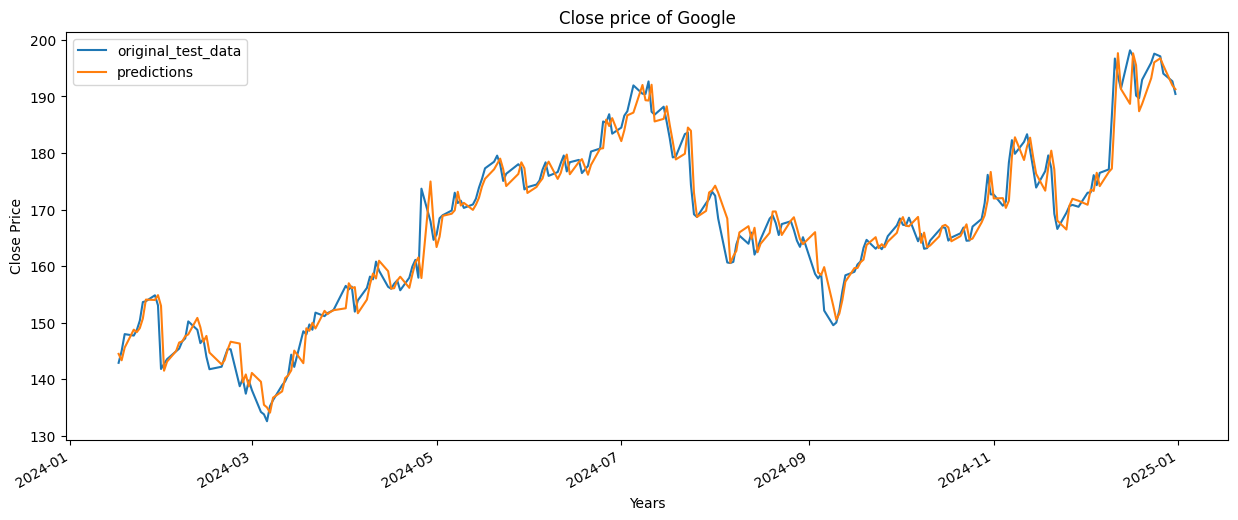

In [30]:
plt.figure()
plotting_data.plot(figsize=(15,6))
plt.xlabel('Years')
plt.ylabel('Close Price')
plt.title('Close price of Google')

In [31]:
last_100 = Closing_price[['Close']].tail(100)
last_100.tail()

Price,Close
Ticker,GOOG
Date,
2024-12-24,197.570007
2024-12-26,197.100006
2024-12-27,194.039993
2024-12-30,192.690002
2024-12-31,190.440002


In [32]:
last_100 = scaler.fit_transform(last_100['Close'].values.reshape(-1,1)).reshape(1,-1,1)
last_100

array([[[0.32599759],
        [0.2963801 ],
        [0.33710399],
        [0.25689023],
        [0.28033735],
        [0.31262873],
        [0.38790614],
        [0.3994243 ],
        [0.37206927],
        [0.32805448],
        [0.36795548],
        [0.37823931],
        [0.34635969],
        [0.30769238],
        [0.28506783],
        [0.32023867],
        [0.18654886],
        [0.17009466],
        [0.18634329],
        [0.05327049],
        [0.        ],
        [0.00966683],
        [0.05368161],
        [0.12340598],
        [0.1816125 ],
        [0.19436467],
        [0.22089682],
        [0.23179765],
        [0.28177724],
        [0.31057184],
        [0.27828077],
        [0.29000418],
        [0.27663532],
        [0.29391208],
        [0.3239407 ],
        [0.36301944],
        [0.38831758],
        [0.36548746],
        [0.36343089],
        [0.39119704],
        [0.30542992],
        [0.33237351],
        [0.27807489],
        [0.28054291],
        [0.30810382],
        [0

In [33]:
last_100.shape

(1, 100, 1)

In [34]:
day101 = model.predict(last_100)
day101

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


array([[0.8294313]], dtype=float32)

In [35]:
scaler.inverse_transform(day101)

array([[189.86694]], dtype=float32)

In [42]:
def predict_future(no_of_days, prev_100):

    future_predictions = []
    for i in range(no_of_days):
        next_day = model.predict(prev_100).tolist()
        # Convert prev_100[0] to a list before appending
        prev_100_list = prev_100[0].tolist()
        prev_100_list.append(next_day[0])
        # Convert back to a NumPy array with the correct shape
        prev_100 = np.array([prev_100_list[1:]])
        prev_100 = prev_100.reshape(1, -1, 1) # Reshape for LSTM input

        future_predictions.append(scaler.inverse_transform(next_day))

    return future_predictions

In [43]:
no_of_days = 10
future_results = predict_future(no_of_days, last_100)
print(future_results)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[array([[189.86695147]]), array([[189.79209379]]), array([[189.9807435]]), array([[190.20313436]]), array([[190.34966195]]), array([[190.39998534]]), array([[190.3862895]]), array([[190.35720828]]), array([[190.35276858]]), array([[190.39342142]])]


Text(0.5, 1.0, 'Future Close price of Google')

<Figure size 640x480 with 0 Axes>

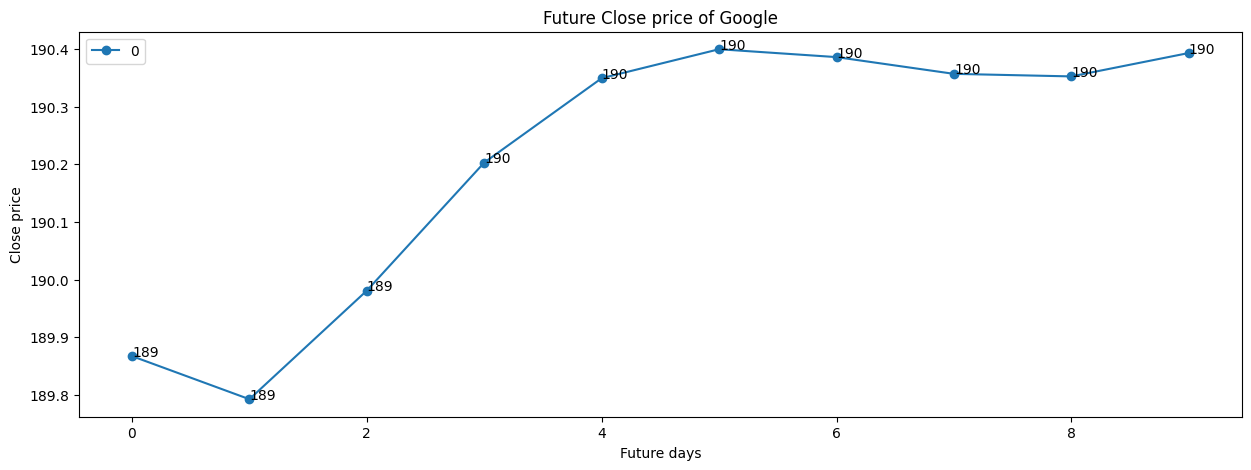

In [46]:
future_results = np.array(future_results).reshape(-1,1)
plt.figure()
pd.DataFrame(future_results).plot(figsize=(15,5), marker='o')
for i in range(len(future_results)):
    plt.text(i,future_results[i],int(future_results[i][0]))
plt.xlabel('Future days')
plt.ylabel('Close price')
plt.title("Future Close price of Google")

In [48]:
model.save("Latest_google_model.keras")